## Install Library

If this is the first time you are running this notebook, please make sure to install the following:

```py
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer
```

and
```py
!sudo apt-get update
!sudo apt-get install espeak-ng
!pip install py-espeak-ng
```

In [1]:
!pip install transformers
!pip install gradio
!pip install timm
!pip install inflect
!pip install phonemizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 5.4 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size=55

In [2]:
!sudo apt-get update
!sudo apt-get install espeak-ng
!pip install py-espeak-ng

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [737 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,569 kB]
Get:13 http://archive.ubuntu.c

In [3]:
from helper import load_image_from_url, render_results_in_image

In [4]:
from transformers import pipeline

In [5]:
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

## Get Model: `facebook/detr-resnet-50`

In [6]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/274 [00:00<?, ?B/s]

## Load Image

In [7]:
from PIL import Image

The code snippet you've provided initializes an object detection pipeline using a pre-trained model named `detr-resnet-50` from Facebook. In the world of machine learning and artificial intelligence, a pipeline refers to a series of processing steps for a specific task. Here, the task is "object-detection", which means the pipeline is configured to identify and locate objects within images. The model `detr-resnet-50` combines the DETR (DEtection TRansformer) architecture with a ResNet-50 backbone. DETR models utilize transformers, a type of neural network architecture, to perform object detection without the need for complex components like non-maximum suppression. By invoking `pipeline` with these parameters, the code is essentially preparing a ready-to-use tool that can take in images and output information about detected objects, such as their classifications and bounding box coordinates, using the specified pre-trained model.

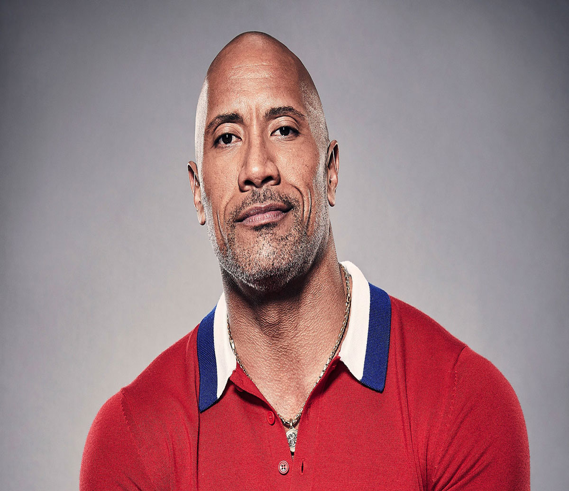

In [8]:
raw_image = Image.open('dwayne-the-rock-.jpg')
raw_image.resize((569, 491))

In [9]:
pipeline_output = od_pipe(raw_image)

The code snippet executes two main operations. Firstly, `pipeline_output = od_pipe(raw_image)` applies the previously initialized object detection pipeline to an image referred to as `raw_image`. This operation processes the image using the defined `object-detection` pipeline, which leverages the `facebook/detr-resnet-50` model to detect objects within the image. The output, `pipeline_output`, typically includes information about each detected object, such as its type, location (bounding boxes), and confidence scores.

Secondly, `processed_image = render_results_in_image(raw_image, pipeline_output)` takes the original `raw_image` and the detection results from `pipeline_output`, then visually annotates the image with these results. This often involves drawing bounding boxes around detected objects and labeling them with their identified classes. The function `render_results_in_image` thus transforms the raw image into a version that visually displays the outcomes of the object detection process, making it easier to understand what objects were detected and where they are located in the image. This processed image is useful for visualization and debugging purposes.

In [10]:
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

In [11]:
type(processed_image)

PIL.PngImagePlugin.PngImageFile

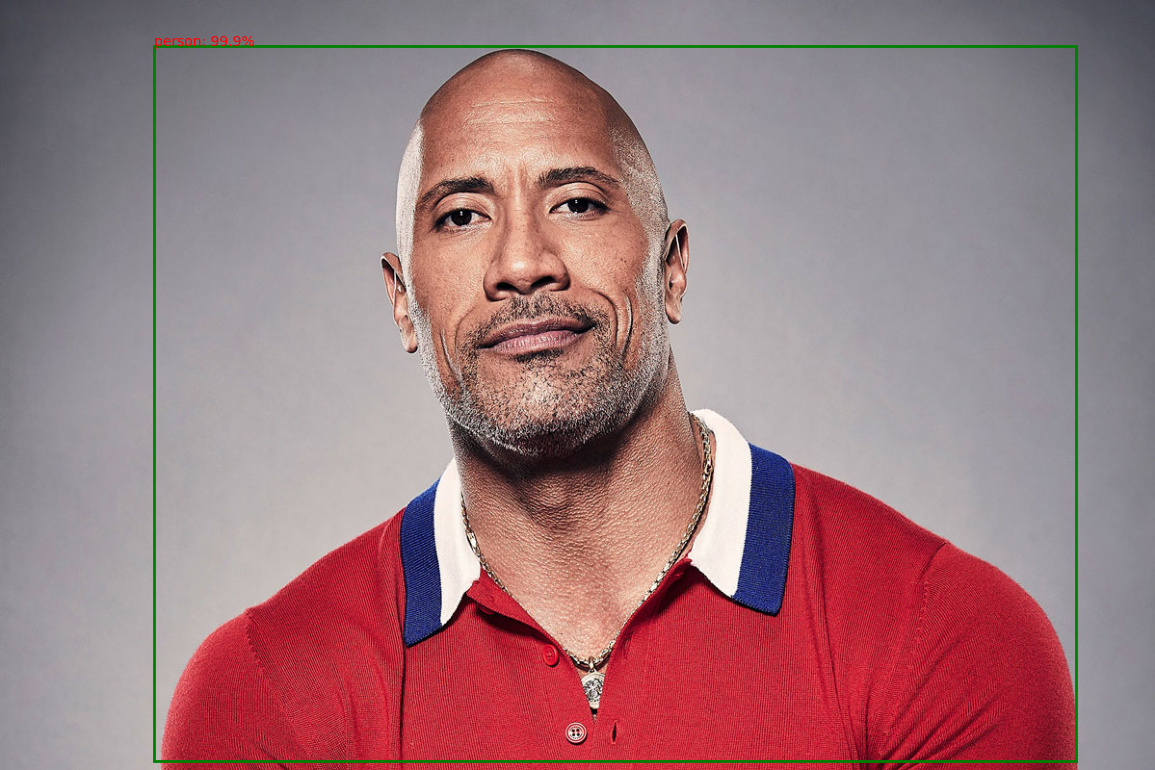

In [12]:
processed_image

In [17]:
pipeline_output

[{'score': 0.9993765950202942,
  'label': 'person',
  'box': {'xmin': 160, 'ymin': 47, 'xmax': 1117, 'ymax': 790}}]

## Text-to-speech: `kakao-enterprise/vits-ljs`

In [20]:
from helper import summarize_predictions_natural_language

In [21]:
text = summarize_predictions_natural_language(pipeline_output)

In [18]:
tts_pipe = pipeline("text-to-speech", model="kakao-enterprise/vits-ljs")

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.14k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

In [22]:
narrated_text = tts_pipe(text)

In [23]:
from IPython.display import Audio as IPythonAudio

In [24]:
IPythonAudio(narrated_text["audio"][0], rate=narrated_text["sampling_rate"])